In [1]:
import IPython.display
from IPython.display import Video,Audio
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
%matplotlib inline

<a id=goto_outline></a>
# Data Processing: Christmas Lecture

Felix Fritzen <fritzen@simtech.uni-stuttgart.de>



(-0.5, 584.5, 548.5, -0.5)

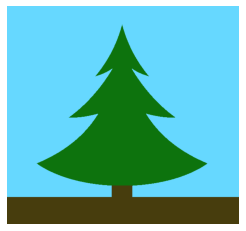

In [2]:
img = cv.imread('xmas_tree.png')
# #0d730d --> [ 13, 115, 13 ] --> 'green'
idx = np.where( (img[:,:,0] == 13)  * (img[:,:,1] == 115)  * (img[:,:,2] == 13) )
mask = np.zeros( img.shape[:2], dtype=np.uint8 )
mask[idx] = 1
fig, ax = plt.subplots(1,1)
ax.imshow(img[:,:,::-1])
ax.axis('off')

Text(0.5, 1.0, 'Our Christmas tree (silhouette)')

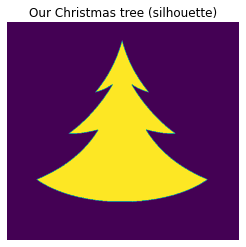

In [3]:
plt.imshow(mask)
plt.axis('off')
plt.title('Our Christmas tree (silhouette)')

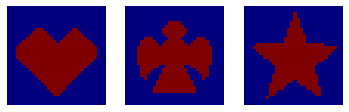

In [4]:
# place random hangers
# 1 --> heart
# 2 --> angel
# 3 --> star

fig, ax = plt.subplots(1,3)
hangers = []

heart = np.zeros((32,32),dtype=np.uint8)
for i in range(13):
    heart[i+16, (i+3):(29-i) ] = 255
for i in range(7):
    heart[13-i, (i+3):(18-i) ] = 255
    heart[13-i, (i+15):(29-i) ] = 255
heart[13:16,3:29] = 255
hangers.append(heart)
ax[0].imshow(heart,cmap='jet')

angel = cv.imread('angel.png').astype(np.uint8)[:,:,0]
hangers.append(angel)
ax[1].imshow(angel,cmap='jet')

star = cv.imread('star.png').astype(np.uint8)[:,:,0]
hangers.append(star)
ax[2].imshow(star,cmap='jet')
for a in ax:
    a.axis('off')


(-0.5, 584.5, 548.5, -0.5)

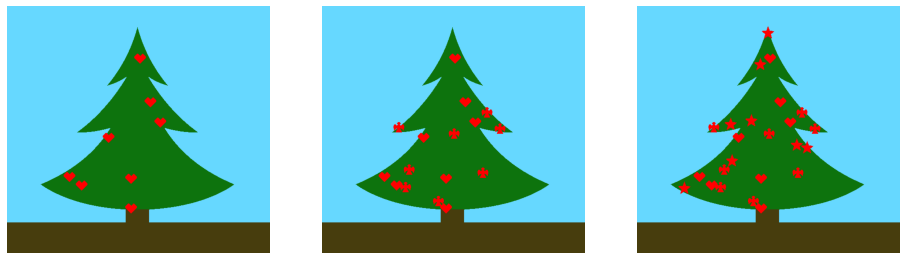

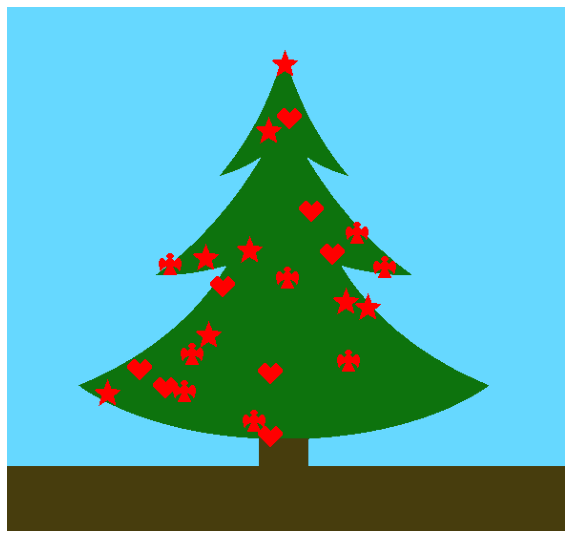

In [5]:
n = 8
fig, ax = plt.subplots(1,3,figsize=(16,10))
new_img = img.copy()
mod_mask = mask.copy()
from scipy.fft import ifft2, fft2
for i in range(len(hangers)):
    new_decoration = np.zeros_like(mask)
    
    h = hangers[i]
    nx= h.shape[1]
    ny= h.shape[0]
    dy_l = int(ny/2)
    dy_h = ny-dy_l
    dx_l = int(nx/2)
    dx_h = nx-dx_l
    
    n_hit = 0
    while n_hit < n:
        x = np.random.randint(0, mask.shape[1])
        y = np.random.randint(0, mask.shape[0])
        new_decoration[y,x] = mod_mask[y,x]
        n_hit += mod_mask[y,x] > 0
        if( mod_mask[y,x] > 0 ):
            # modify the mask in the surrounding to avoid overlap
            mod_mask[y-dy_l:y+dy_h, x-dx_l:x+dx_h] = 0
            
    padded_hanger = np.zeros_like(mask)
    padded_hanger[:ny,:nx] = h
    padded_hanger = np.roll( padded_hanger, shift=(-int(ny/2),-int(nx/2)), axis=(0,1) )
    new_decoration = np.real(ifft2( fft2(new_decoration) * fft2(padded_hanger))).astype(np.uint8)
    [Y,X] = np.where(new_decoration)
    col = np.array([0,0,255], dtype=np.uint8)
    new_img[Y,X,:] = col[None,None,:]
    ax[i].imshow(new_img[:,:,[2,1,0]])
    ax[i].axis('off')
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(new_img[:,:,::-1])
ax.axis('off')

# Over-the-years-gap-filling-task

* based on the randomized christmas decoration build a code for drawing **fireworks**
* a potential background is given below: **University of Stuttgart Silhouette**
<div>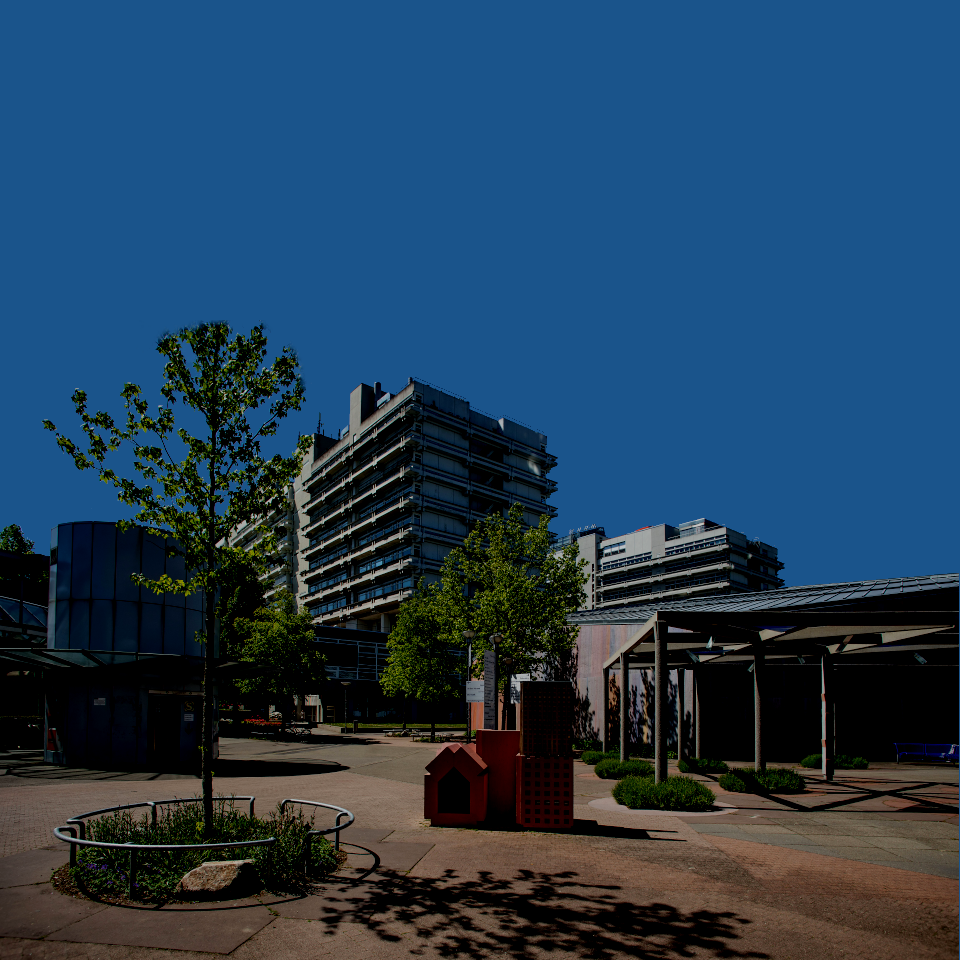</div>

<font color='blue' size=4>**Things to do (or not to)**</font>
* create a mask for the sky, for the foreground, ...
* create templates for your favorite fireworks, Bengalian lights, ...
* paint your new year's firework


<font color='magenta' size=4>**Your submissions are welcome!!!**
</font>
